In [1]:
import pandas as pd
from experiment_measurement.rosbag2df import read_rosbag_all_in_one
from experiment_measurement.data_aggregation import aggregate_tables

### change the following line according to what config you want to use
from experiment_measurement.config.trajectory_follower_experiment import table_column_config

In [2]:
# read data from sqlite db
data = read_rosbag_all_in_one('/home/basti/ros/driving_swarm_infrastructure/rosbag2_2021_03_23-13_51_16/rosbag2_2021_03_23-13_51_16_0.db3')

In [3]:
# create pandas dataframe from raw data
tables = aggregate_tables(data['rosbag'], table_column_config, 10**9)

In [5]:
# combine data for multiple robots into one dataframe
for robot in tables.keys():
    tables[robot]['robot'] = robot
df = pd.concat(tables.values())

In [9]:
# here is the dataframe
df.head()

,timestamp,trans_vel,rot_vel,amcl_pose_x,amcl_pose_y,amcl_pose_theta,tf_pose_x,tf_pose_y,tf_pose_theta,amcl_traveled_distance,tf_traveled_distance,min_obstacle_dist,reached_goals,desired_x,desired_y,desired_theta,robot
0,1616503877369818431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,0,NaN,NaN,NaN,robot1
1,1616503878369818431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,0,NaN,NaN,NaN,robot1
2,1616503879369818431,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,0,NaN,NaN,NaN,robot1
3,1616503880369818431,0.0,0.0,0.15,1.05,3.0,NaN,NaN,NaN,0.0,0.000000,0.228104,0,NaN,NaN,NaN,robot1
4,1616503881369818431,0.0,0.0,NaN,NaN,NaN,0.149317,1.050024,3.000342,0.0,0.000042,0.219228,0,NaN,NaN,NaN,robot1


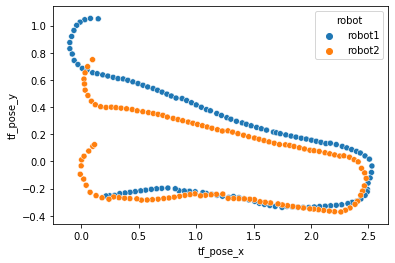

In [8]:
# work with the data (i.e. visualize the path)
import seaborn as sns
sns.scatterplot(data=df, x='tf_pose_x', y='tf_pose_y', hue='robot')